In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv("final_final_2.csv")

In [78]:
df.isnull().sum()

season              0
area(hec)           0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
production(MT)      0
dtype: int64

In [52]:
df.head()

,season,area(hec),tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,production(MT)
0,1,491.0,31.426257,21.556983,27.377654,35.978212,21.556983,29.975978,22.402235,75.672737,20.652514,169.201117,1009.093296,45.236872,11.863128,1695
1,2,384.0,30.735119,21.498810,27.035714,35.520833,21.498810,29.496429,23.038690,79.574762,19.487500,187.786905,1009.424405,57.911310,12.922024,3648
2,1,504.0,32.743094,21.376796,27.580110,37.991160,21.376796,30.455249,22.895580,77.036298,20.113260,164.210497,1009.548619,50.776796,13.509392,1715
3,2,414.0,30.269022,21.120109,26.505435,34.859783,21.120109,28.627717,22.838587,80.983152,19.066304,202.689674,1008.176087,67.685870,13.566304,3929
4,1,496.0,31.633523,21.084659,27.017045,36.293750,21.084659,29.450568,22.651136,78.151420,20.335795,165.268750,1008.642045,60.318750,13.209659,1587


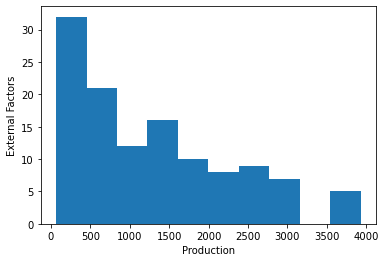

In [53]:
plt.hist(df["production(MT)"])
plt.xlabel("Production")
plt.ylabel("External Factors")
plt.show()

In [54]:
corr = df.corr()
corr.style.background_gradient(cmap ='coolwarm')

,season,area(hec),tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,production(MT)
season,1.000000,0.176128,-0.159779,0.035609,-0.056854,-0.117324,0.033864,-0.064999,0.048945,0.520993,0.024859,0.606298,-0.256986,0.769187,-0.086243,0.339033
area(hec),0.176128,1.000000,0.312890,0.053625,0.258021,0.286889,0.027120,0.246640,0.250245,-0.180513,0.228457,-0.028728,-0.275195,0.027880,-0.311784,0.752533
tempmax,-0.159779,0.312890,1.000000,0.881617,0.967746,0.974022,0.870712,0.954345,0.937462,-0.709532,0.317912,-0.389034,-0.052469,-0.511546,-0.454806,0.172952
tempmin,0.035609,0.053625,0.881617,1.000000,0.955574,0.915804,0.998708,0.945720,0.969062,-0.492064,0.281337,-0.165467,-0.067694,-0.284540,-0.394698,0.037838
temp,-0.056854,0.258021,0.967746,0.955574,1.000000,0.988041,0.948535,0.991899,0.986817,-0.643159,0.360040,-0.318260,-0.087582,-0.416658,-0.493621,0.154515
feelslikemax,-0.117324,0.286889,0.974022,0.915804,0.988041,1.000000,0.909223,0.990603,0.962617,-0.701148,0.428716,-0.411469,-0.065216,-0.495332,-0.551391,0.143886
feelslikemin,0.033864,0.027120,0.870712,0.998708,0.948535,0.909223,1.000000,0.942868,0.960421,-0.497716,0.303246,-0.176302,-0.065588,-0.285780,-0.412858,0.016460
feelslike,-0.064999,0.246640,0.954345,0.945720,0.991899,0.990603,0.942868,1.000000,0.972890,-0.672823,0.465084,-0.371249,-0.099534,-0.438847,-0.580884,0.123659
dew,0.048945,0.250245,0.937462,0.969062,0.986817,0.962617,0.960421,0.972890,1.000000,-0.514006,0.312939,-0.214347,-0.104550,-0.298394,-0.454696,0.179107
humidity,0.520993,-0.180513,-0.709532,-0.492064,-0.643159,-0.701148,-0.497716,-0.672823,-0.514006,1.000000,-0.467507,0.685150,-0.039645,0.807982,0.512557,0.029574


In [55]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=100)

In [57]:
X_train.shape

(90, 15)

In [58]:
y_train.shape

(90,)

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
rf = RandomForestRegressor()

In [61]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [62]:
y_pred = rf.predict(X_test)

In [63]:
y_pred

array([2391.7 , 1035.49,  232.82, 1496.  ,  302.53,  456.57,  312.51,
       2138.35,  347.74,  232.06, 3203.31, 1504.02,  535.12,  359.8 ,
        205.98, 1337.48,  776.57,  257.08,  353.38, 2378.08,  529.11,
        781.06,  639.14, 2372.12,  240.29, 1915.09, 1289.85,  603.43,
        190.18,  745.58])

In [64]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

316501.0208

In [65]:
np.sqrt(mean_squared_error(y_test,y_pred))

562.584234404058

In [75]:
# from sklearn.model_selection import GridSearchCV
# rfr = RandomForestRegressor(random_state = 1)
# param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
# g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

#                           cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [74]:
# g_search.fit(X_train, y_train);
# print(g_search.best_params_)

In [73]:
# print(g_search.score(X_test, y_test))

In [76]:
rf.score(X_test,y_test)

0.6658249211857334